Importowanie potrzebnych bibliotek

In [2]:
import random
import math     #cos() function for calculate Rastrigin
import copy     #use to copy array
import sys      #max float
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

Zainicjowanie fitness function 
1) Rastrigin
2) Sphere

PS. co to jest fitness function
Funkcja ta pozwala ocenić pozycję cząsteczek, aby dążyły do optimum. Wszystkie cząstki mają swoje wartości, które poźniej oceniane są poprzez fitness function, aby dążyć do optimum.

Rastrigin function

In [3]:
def fitness_rastrigin(position):
    fitnessValue = 0.0
    for i in range(len(position)):
        xi = position[i]
        fitnessValue += (xi * xi) - (10 * math.cos(2 * math.pi * xi)) + 10
    return fitnessValue

Sphere function

In [4]:
def fitness_sphere(position):
	fitnessValue = 0.0
	for i in range(len(position)):
		xi = position[i]
		fitnessValue += (xi*xi)
	return fitnessValue

Klasa dla cząstek

In [5]:
class Particle:
    def __init__(self, fitness, dim, minx, maxx, seed):
        # initialize generator which will generate seed = i const value 
        self.rnd = random.Random(seed)

        # initialize position of the particle with 0.0 value
        self.position = [0.0 for i in range(dim)]

        # initialize velocity of the particle with 0.0 value
        self.velocity = [0.0 for i in range(dim)]

        # initialize best particle position of the particle with 0.0 value
        self.best_part_pos = [0.0 for i in range(dim)]

        # loop dim times to calculate random position and velocity
        # range of position and velocity is [minx, max]
        for i in range(dim):
            self.position[i] = ((maxx - minx) *
                self.rnd.random() + minx)
            self.velocity[i] = ((maxx - minx) *
                self.rnd.random() + minx)

        # compute fitness of particle
        self.fitness = fitness(self.position) # curr fitness

        # initialize best position and fitness of this particle
        self.best_part_pos = copy.copy(self.position) # best position value of  particle
        self.best_part_fitnessVal = self.fitness # best fitness value of  particle

Funkcja odpowiadająca algorytmowi PSO
w - współczynnik bezwładnośc
c1 - współczynnik poznawczy
c2 - współczynnik społeczny

In [6]:
# particle swarm optimization function
def pso(fitness, max_iter, n, dim, minx, maxx):
  # hyper parameters
  w = 0.729    # inertia
  c1 = 1.49445 # cognitive (particle)
  c2 = 1.49445 # social (swarm)

  # random.random()
  # Return the next random floating point number in the range 0.0 <= X < 1.0
  rnd = random.Random(0)

  # create n random particeles (Objects of Particle class)
  global swarm 
  swarm = [Particle(fitness, dim, minx, maxx, i) for i in range(n)]

  # compute the value of best position and best_fitness in swarm
  best_swarm_pos = [0.0 for i in range(dim)]
  best_swarm_fitnessVal = sys.float_info.max # swarm best. Get max float value (1.7976931348623157e+308)

  # compute best praticle of swarm and it's fitness
  for i in range(n):  # check each particle
    if swarm[i].fitness < best_swarm_fitnessVal: # in first itteration first fitness value of particle is best_swarm_fitnessValue. Save min fitness value!!!!
      best_swarm_fitnessVal = swarm[i].fitness
      best_swarm_pos = copy.copy(swarm[i].position)

  # main loop of pso
  Iteration = 0
  while Iteration < max_iter:
    for i in range(n):  # process each particle
      # compute new velocity of current particle
      for k in range(dim):
        r1 = rnd.random() # randomization
        r2 = rnd.random()

        swarm[i].velocity[k] = (
                                  (w * swarm[i].velocity[k]) +
                                  (c1 * r1 * (swarm[i].best_part_pos[k] - swarm[i].position[k])) + 
                                  (c2 *  r2 * (best_swarm_pos[k] - swarm[i].position[k]))
                                )
        
        # if velocity[k] is not in [min, max]
        #then clip it
        if swarm[i].velocity[k] < minx: # if velocity is less than minx, give it min value
          swarm[i].velocity[k] = minx
        elif swarm[i].velocity[k] > maxx: # the same like above but assign a higher value
          swarm[i].velocity[k] = maxx

      # compute new position using new velocity
      for k in range(dim):
        swarm[i].position[k] += swarm[i].velocity[k]
      
      # compute fitness of new position
      swarm[i].fitness = fitness(swarm[i].position)

      # We check if new particle fitness is better than actuall best_part_fitnessValue for particle
      # eg. actuall best_fitness of this particle 23.99 and computed recently fitness 19.00, 
      # so we see compute value is better than actual save value
      if swarm[i].fitness < swarm[i].best_part_fitnessVal:
        swarm[i].best_part_fitnessVal = swarm[i].fitness
        swarm[i].best_part_pos = copy.copy(swarm[i].position)

      # We must check if new position is new best value fitness for swarm
      if swarm[i].fitness < best_swarm_fitnessVal:
        best_swarm_fitnessVal = swarm[i].fitness
        best_swarm_pos = copy.copy(swarm[i].position)

    # for each particle, we make the same cycle
    Iteration += 1

  #end while loop
  return best_swarm_pos

TESTY

In [7]:
f = open("output.txt", "a")
print("\nBegin particle swarm optimization on rastrigin function\n", file=f)
dim = 2
fitness = fitness_rastrigin

num_particles = 50
max_iter = 100

print("Setting num_particles = " + str(num_particles), file=f)
print("Setting max_iter = " + str(max_iter), file=f)
print("\nStarting PSO algorithm\n", file=f)



best_position = pso(fitness, max_iter, num_particles, dim, -10.0, 10.0)

print("\nPSO completed\n", file=f)
print("\nBest solution found:", file=f)
print(["%.6f"%best_position[k] for k in range(dim)], file=f)
fitnessVal = fitness(best_position)
print("fitness of best solution = %.6f" % fitnessVal, file=f)

print("\nEnd particle swarm for rastrigin function\n", file=f)


print(file=f)
print(file=f)


# Driver code for Sphere function
print("\nBegin particle swarm optimization on sphere function\n", file=f)
dim = 2
fitness = fitness_sphere

num_particles = 50
max_iter = 100

print("Setting num_particles = " + str(num_particles), file=f)
print("Setting max_iter = " + str(max_iter), file=f)
print("\nStarting PSO algorithm\n", file=f)



best_position = pso(fitness, max_iter, num_particles, dim, -10.0, 10.0)

print("\nPSO completed\n", file=f)
print("\nBest solution found:", file=f)
print(["%.6f"%best_position[k] for k in range(dim)], file=f)
fitnessVal = fitness(best_position)
print("fitness of best solution = %.6f" % fitnessVal, file=f)

print("\nEnd particle swarm for sphere function\n", file=f)

f.close()

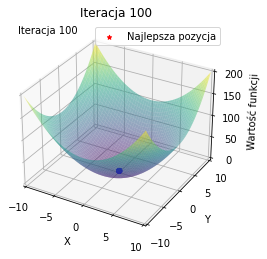

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

def sphere_function(x, y):
    """Funkcja celu - sfera"""
    return x**2 + y**2

class Particle:
    def __init__(self):
        self.position = np.random.uniform(-10, 10, 2)
        self.velocity = np.random.uniform(-1, 1, 2)
        self.best_position = self.position
        self.best_score = sphere_function(*self.position)

    def update_velocity(self, global_best_position, inertia_weight, cognitive_weight, social_weight):
        r1 = np.random.rand(2)
        r2 = np.random.rand(2)

        cognitive_component = cognitive_weight * r1 * (self.best_position - self.position)
        social_component = social_weight * r2 * (global_best_position - self.position)
        self.velocity = inertia_weight * self.velocity + cognitive_component + social_component

    def update_position(self):
        self.position += self.velocity
        self.position = np.clip(self.position, -10, 10)
        current_score = sphere_function(*self.position)
        if current_score < self.best_score:
            self.best_position = self.position
            self.best_score = current_score

def particle_swarm_optimization(num_particles, max_iterations):
    swarm = [Particle() for _ in range(num_particles)]
    global_best_position = swarm[0].position  # Inicjalizacja globalnej najlepszej pozycji
    global_best_score = sphere_function(*global_best_position)

    positions = []  # Lista pozycji cząstek w każdej iteracji

    for _ in range(max_iterations):
        iteration_positions = []  # Pozycje cząstek w bieżącej iteracji
        for particle in swarm:
            particle.update_velocity(global_best_position, 0.5, 0.8, 0.8)
            particle.update_position()
            if particle.best_score < global_best_score:
                global_best_position = particle.best_position
                global_best_score = particle.best_score
            iteration_positions.append(particle.position)
        positions.append(iteration_positions)

    return global_best_position, global_best_score, positions

# Wywołanie algorytmu PSO
best_position, best_score, positions = particle_swarm_optimization(num_particles=50, max_iterations=100)

# Tworzenie siatki punktów dla wykresu funkcji sferycznej
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = sphere_function(X, Y)

# Inicjalizacja wykresu
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

iteration_text = ax.text2D(0.05, 0.95, '', transform=ax.transAxes)

def animate(i):
    ax.clear()
    ax.set_title(f'Iteracja {i+1}')
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_zlim(0, 200)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Wartość funkcji')

    # Dodanie marginesów dla osi
    ax.margins(x=0.2, y=0.2, z=0.2)

    ax.scatter([p[0] for p in positions[i]], [p[1] for p in positions[i]],
               [sphere_function(*p) for p in positions[i]], color='b')
    ax.scatter(best_position[0], best_position[1], best_score, color='r', marker='*', label='Najlepsza pozycja')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)  # Wyświetlanie funkcji sferycznej
    ax.legend()

    iteration_text.set_text(f'Iteracja {i+1}')
    ax.add_artist(iteration_text)

ani = FuncAnimation(fig, animate, frames=len(positions), interval=600)
ani.save('animation.gif', writer='pillow')
